In [1]:
import pandas as pd
from holoviews.plotting.bokeh.styles import alpha

In [2]:
df = pd.read_csv(r"C:\Users\andre\Рабочий стол\Практикум\Специалист по Data Science Плюс. Часть 3\01 Исследовательский анализ данных\07 Проектная работа\real_estate_data.csv", sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

## Заполнение пропусков в ceiling_height

In [5]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<Axes: ylabel='Frequency'>

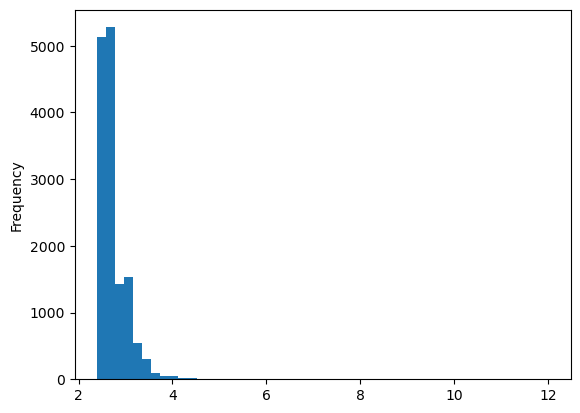

In [6]:
df['ceiling_height'].plot(kind='hist', bins=50,range=(2.4,12))

Предположим, что значения высоты потолка варьируются в интервале от 2.4 до 12 метров. Выводы сделаны согласно строительным нормативам для разных временных периодов. Для заполнения пропущенных значений используем медианное значение - 2.6 метров.

In [7]:
ceiling_height_median = df['ceiling_height'].median()

In [8]:
df['ceiling_height'].fillna(ceiling_height_median, inplace=True)

## Заполнение пропусков в floors_total

In [9]:
df['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<Axes: ylabel='Frequency'>

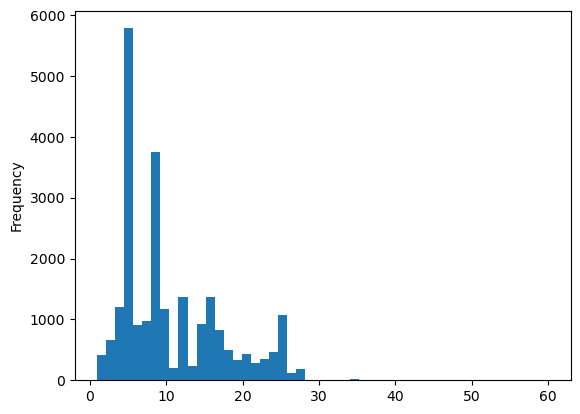

In [10]:
df['floors_total'].plot(kind='hist', bins=50,range=(1,60))

In [11]:
pd.Series(df[df['floors_total'].isna()]['floor'].sort_values(ascending=True).unique())

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    17
16    18
17    19
18    20
19    21
20    22
21    23
22    24
dtype: int64

Медиана = 9, среднее арифметическое = 10. Значение floors_total стоит оставить без изменений, так как заполнение медианой из средним арифметическим будет нелогично из-за того, что есть квартиры находящиеся на более высоких этажах. 

## Заполнение пропусков в living_area

In [12]:
df['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Заполнение living_area каким либо значением недопустимо, так как каждая квартира может иметь свою уникальную планировку. Это может повлиять на аналитические выводы и обобщающую способность модели.

## Заполнение пропусков в is_apartment

In [13]:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [14]:
df.loc[df['is_apartment'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Заполнение колонки is_apartment невозможно, так как мы не можем заполнить каким либо значением из-за отсутствия сведений.

## Заполнение пропусков в kitchen_area

Заполнение kitchen_area каким либо значением недопустимо, так как каждая квартира может иметь свою уникальную планировку. Это может повлиять на аналитические выводы и обобщающую способность модели.

## Заполнение пропусков в balcony

Значения в balcony заполним 0. Так как можно предположить, что пользователь не указал данные о балконе, так как балкона нет вовсе.

In [15]:
df['balcony'] = df['balcony'].fillna(0)

## Заполнение оставшихся пропусков

Данные о locality_name
airports_nearest
cityCenters_nearest
parks_around3000
parks_nearest
ponds_around3000
ponds_nearest
days_exposition
не могут быть заполнены. Эти данные представляют географические и временные характеристики, которые сложно или невозможно восстановить корректно. Их заполнение какими-либо значениями может исказить аналитику и внести в модель неточные сведения.

## Изменение типов данных

- first_day_exposition   

Текущий формат object лучше преобразовать в datetime, чтобы упростить вычисления, связанные с датами, такие как расчёт продолжительности публикации или сортировка по дате.

In [16]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

- is_apartment  
  
Данные в is_apartment содержат пропуски, а остальные значения, скорее всего, указывают на наличие/отсутствие апартаментов. Преобразование этого поля в bool (с учетом пропусков, например, NaN → unknown или False) облегчит его обработку.

In [17]:
df['is_apartment'] = df['is_apartment'].astype(bool)

-  balcony  

Количество балконов также можно представить в целых числах, используя Int64 для учета пропущенных значений. Это позволит более логично и удобно работать с данными.

In [18]:
df['balcony'] = df['balcony'].astype(int, errors='ignore')

In [19]:
df['balcony'].head()

0    0
1    2
2    0
3    0
4    0
Name: balcony, dtype: int32

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

## Посчитайте и добавьте в таблицу

### Цена за метр

In [21]:
df['price_per_m2'] = df['last_price']/df['total_area']

### Даты

In [22]:
df['day_of_week'] = df['first_day_exposition'].dt.dayofweek
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

### Категории

In [23]:
def categorize(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [24]:
df['floor_type'] = df.apply(categorize, axis=1)

### Соотношения

In [25]:
df['live_to_whole'] = df['living_area']/df['total_area']
df['kitchen_to_whole'] = df['kitchen_area']/df['total_area']

## Исследовательский анализ данных

<Axes: >

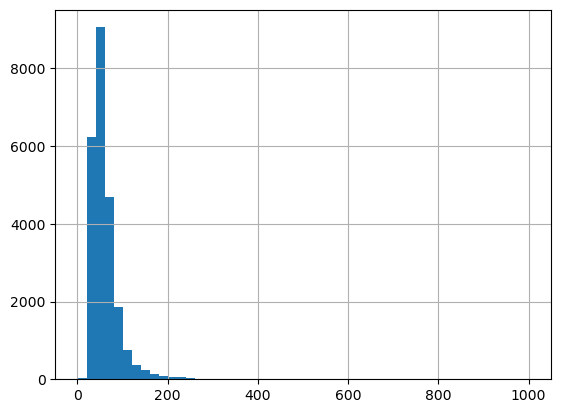

In [26]:
df['total_area'].hist(bins=50, range=(1,1000))

In [27]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<Axes: >

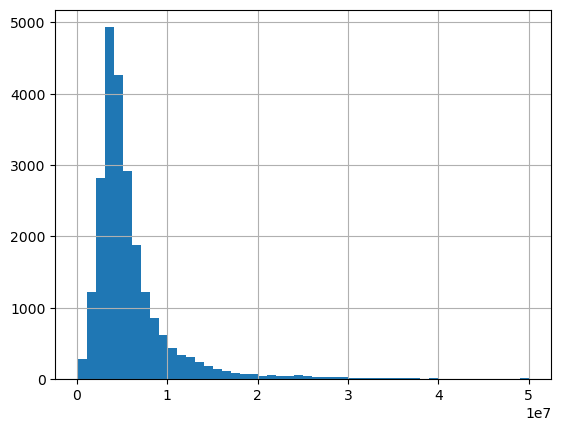

In [28]:
df['last_price'].hist(bins=50, range=(0.1*(10**6), 5*10**7))

<Axes: >

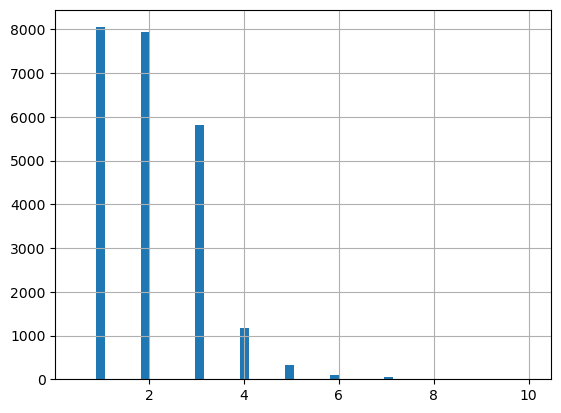

In [29]:
df['rooms'].hist(bins=50, range=(0.5,10))

<Axes: >

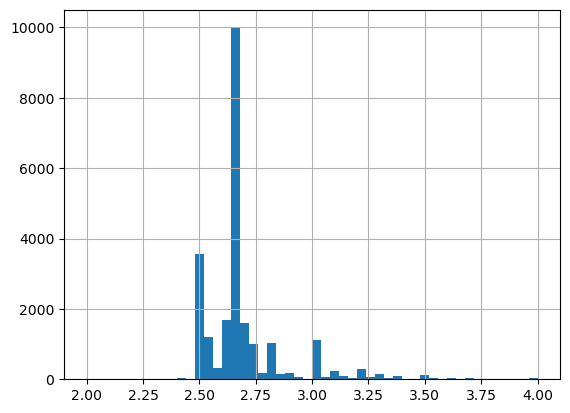

In [30]:
df['ceiling_height'].hist(bins=50, range=(2,4))

### Время продажи 

<Axes: >

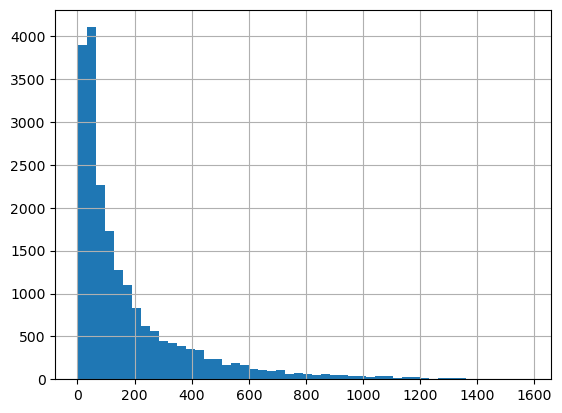

In [31]:
df['days_exposition'].hist(bins=50)

In [32]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Обычно продажа занимает около 95 дней. Согласно диаграмме распределения быстрой продажей можно считать ту, которая занимает до 45 дней, а долгой - более 232 дней.

### Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.


In [33]:
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [34]:
df['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [35]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [36]:
df['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [37]:
filtred_df = df[((df['rooms'] > 0) & df['studio'] == False) & (df['rooms'] <= 12)]

In [38]:
filtred_df = filtred_df[(filtred_df['ceiling_height'] >= 2.4) & (filtred_df['ceiling_height'] <= 6)]

In [39]:
filtred_df = filtred_df[(filtred_df['floors_total'] > 1) & (filtred_df['floors_total'] <= 37) ]

- Обнаружены квартиры с аномально большим числом комнат, что может быть обусловлено ошибками при внесении данных или нетипичным сегментом недвижимости (например, большие многокомнатные квартиры, объединённые из нескольких).
- Высота потолков от 1 метра и выше 6 метров, вероятно, вызвана ошибками ввода данных, так как такие значения не соответствуют нормам для жилых помещений.
- Дома с более чем 37 этажами скорее всего включают ошибки ввода данных.

## Какие факторы больше всего влияют на стоимость квартиры?

In [40]:
def influence_on_price(row):
    print(filtred_df[row].corr(filtred_df['last_price']))
    filtred_df.plot(x=row,y='last_price',kind='scatter', alpha=0.08)

### Площадь

0.6546102181939092


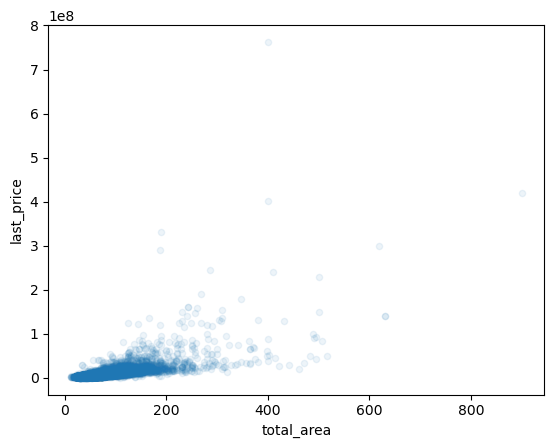

In [41]:
influence_on_price('total_area')

### Количество комнат

0.36285766237179573


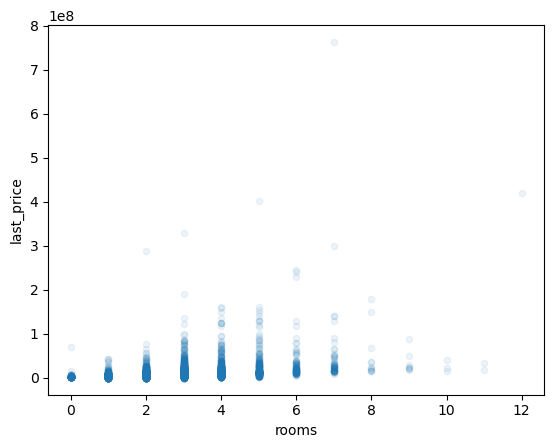

In [42]:
influence_on_price('rooms')

### Удаленность

-0.2058194248120355


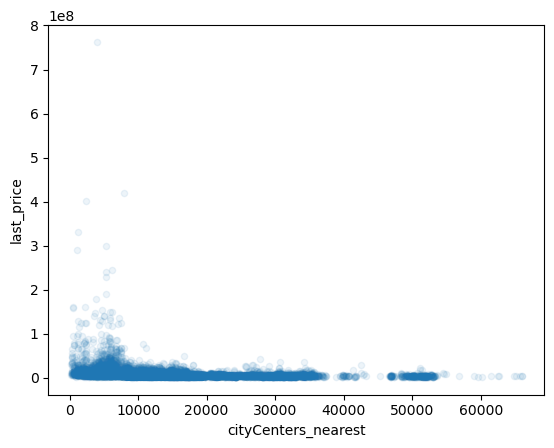

In [43]:
influence_on_price('cityCenters_nearest')

### Этаж

In [44]:
floor_type_df = filtred_df.loc[:,['floor_type','floor', 'last_price']]

In [45]:
floor_type_df.groupby('floor_type')['last_price'].describe()

,count,mean,std,min,25%,50%,75%,max
floor_type,,,,,,,,
другой,17312.0,6.674162e+06,8.617801e+06,450000.0,3600000.0,4850000.0,7000000.0,330000000.0
первый,2882.0,4.827811e+06,5.120978e+06,430000.0,2800000.0,3900000.0,5407500.0,135000000.0
последний,3327.0,7.362212e+06,2.071609e+07,12190.0,3000000.0,4300000.0,6700000.0,763000000.0


Можно отметить, что на первом этаже самые дешевые квартиры.

### Дата

0.0011051048504664806


<Axes: xlabel='day_of_week', ylabel='last_price'>

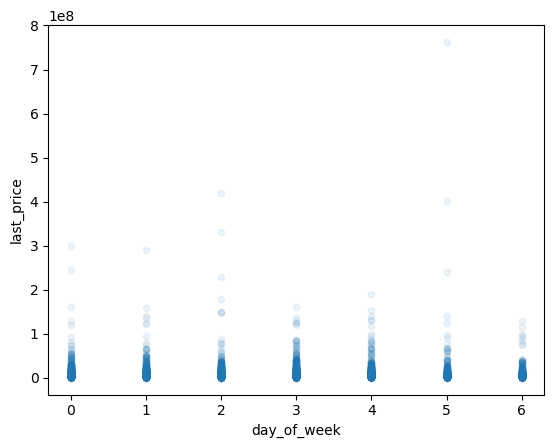

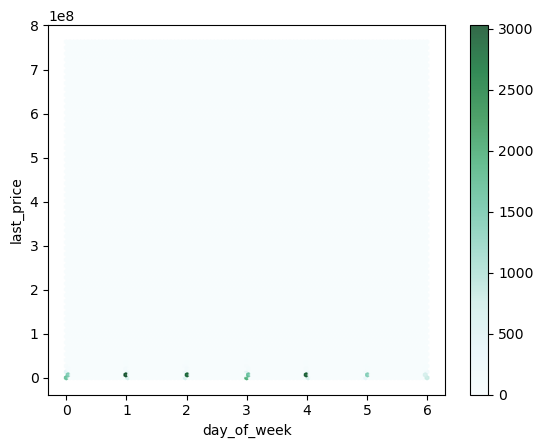

In [46]:
influence_on_price('day_of_week')
filtred_df.plot(x='day_of_week',y='last_price',kind='hexbin', alpha=0.8)

0.003129743949408186


<Axes: xlabel='month', ylabel='last_price'>

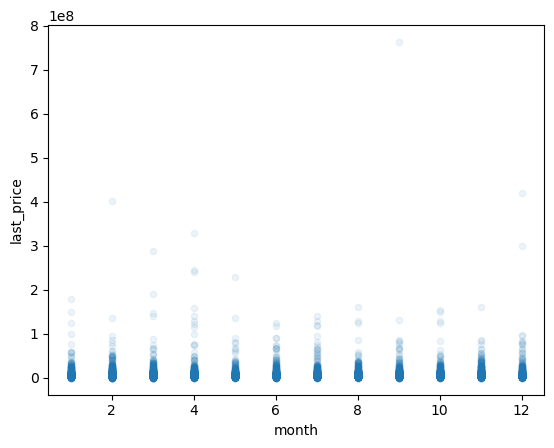

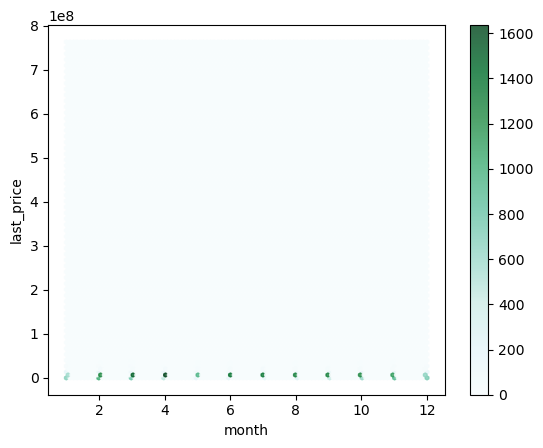

In [47]:
influence_on_price('month')
filtred_df.plot(x='month',y='last_price',kind='hexbin', alpha=0.8)

-0.04331830727320905


<Axes: xlabel='year', ylabel='last_price'>

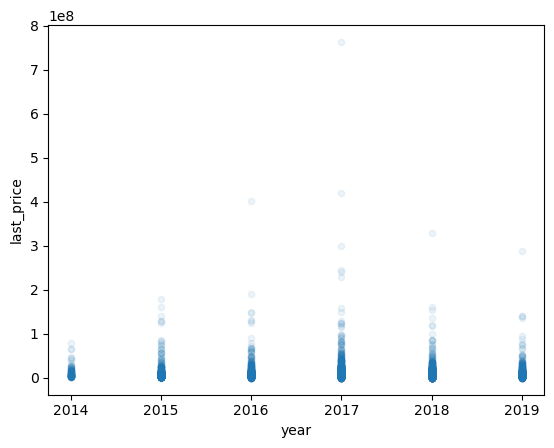

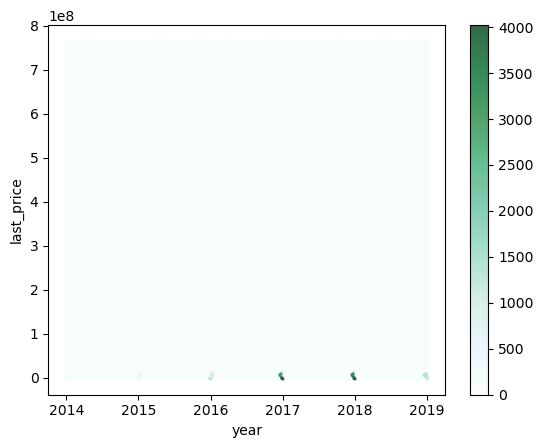

In [48]:
influence_on_price('year')
filtred_df.plot(x='year',y='last_price',kind='hexbin', alpha=0.8)

### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах.

In [56]:
(filtred_df.groupby(by='locality_name')
 .agg(
    {
        'rooms':'count',
        'price_per_m2':'mean'
    }
).sort_values(by='rooms',ascending=False))


,rooms,price_per_m2
locality_name,,
Санкт-Петербург,15617,114860.651635
посёлок Мурино,518,85645.903323
посёлок Шушары,439,78551.344545
Всеволожск,397,68719.320400
Пушкин,369,103125.819291
...,...,...
поселок Гаврилово,1,27209.302326
поселок Гладкое,1,30769.230769
посёлок Дзержинского,1,33439.490446


### Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. 

In [52]:
filtred_df['km_to_city_center'] = (filtred_df['cityCenters_nearest']/1000).round()

### После этого посчитайте среднюю цену для каждого километра.

In [53]:
filtred_df.groupby(by='km_to_city_center')['price_per_m2'].mean().sort_values(ascending=False)

km_to_city_center
0.0     245833.530289
1.0     176640.649827
2.0     158077.120745
7.0     156176.879664
6.0     151012.193621
            ...      
62.0     69114.470842
60.0     65221.774194
63.0     62500.000000
42.0     62479.371267
61.0     60606.060606
Name: price_per_m2, Length: 61, dtype: float64

<Axes: xlabel='km_to_city_center'>

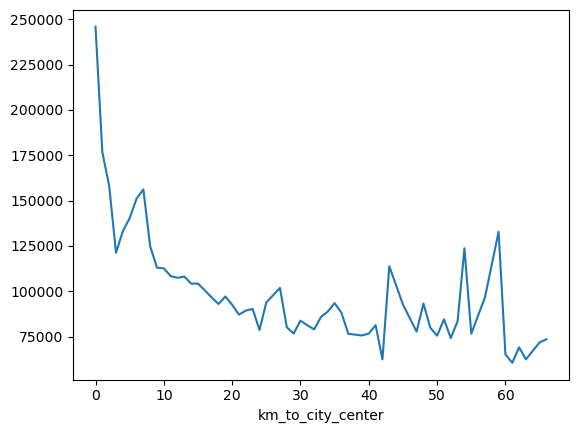

In [58]:
filtred_df.groupby(by='km_to_city_center')['price_per_m2'].mean().plot(kind='line', x='km_to_city_center', y='price_per_m2')

In [ ]:
center_df = filtred_df.loc(0<=filtred_df['km_to_city_center']<=, axis=1)

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [ ]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [ ]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [ ]  в каждом этапе есть выводы
- [ ]  есть общий вывод